In [3]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,UpSampling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout,BatchNormalization
from keras import optimizers
from keras import applications
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import math 
import datetime
import time
import tensorflow as tf
from keras.optimizers import Adam

In [13]:
from tqdm import tqdm
from keras.preprocessing.image import img_to_array
from matplotlib.pyplot import imshow
import  cv2

In [34]:
SIZE=128
import os
path='/home/heroo/datascience/23777_30378_upload_test_set/test_set/dogs'
dog_img=[]
files=os.listdir(path)
for i in tqdm(files):
    img=cv2.imread(path+'/'+i,1)  #Change 0 to 1 for color images
    if img is not None:
        imgx=cv2.resize(img,(128, 128))
        dog_img.append(img_to_array(imgx))
    else:
        print("not")
    

 88%|████████▊ | 891/1013 [00:01<00:00, 509.88it/s]

not


100%|██████████| 1013/1013 [00:02<00:00, 487.86it/s]


In [54]:
SIZE=128
dog_img=np.reshape(dog_img,(len(dog_img),SIZE,SIZE,3))

In [36]:
dog_img.shape

(1012, 128, 128, 3)

In [55]:
dog_img=dog_img[:-1,:]

In [57]:
dog_img=dog_img.astype('float32')/128
dog_img.shape

(1011, 128, 128, 3)

In [37]:
SIZE=128
import os
path='/home/heroo/datascience/23777_30378_upload_test_set/test_set/cats'
cat_img=[]
files=os.listdir(path)
for i in tqdm(files):
    img=cv2.imread(path+'/'+i,1)  #Change 0 to 1 for color images
    if img is not None:
        imgx=cv2.resize(img,(128, 128))
        cat_img.append(img_to_array(imgx))
    else:
        print("not")
    

 83%|████████▎ | 845/1012 [00:01<00:00, 508.08it/s]

not


100%|██████████| 1012/1012 [00:02<00:00, 492.30it/s]


In [38]:
cat_img=np.reshape(cat_img,(len(cat_img),SIZE,SIZE,3))

In [39]:
cat_img.shape

(1011, 128, 128, 3)

In [43]:
cat_img=cat_img.astype("float32")/128

In [49]:
encoder=Sequential()
encoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
encoder.add(MaxPooling2D((2, 2), padding='same'))
encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
encoder.add(MaxPooling2D((2, 2), padding='same'))
encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
encoder.add(MaxPooling2D((2, 2), padding='same'))

encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
encoder.add(UpSampling2D((2, 2)))
encoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
encoder.add(UpSampling2D((2, 2)))
encoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
encoder.add(UpSampling2D((2, 2)))
encoder.add(Conv2D(3, (3, 3), activation='relu', padding='same'))
        
        
encoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
encoder.summary()
        


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 8)         2312      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 8)        

In [59]:
import tensorflow as tf
'''callbacks = [tf.keras.callbacks.TensorBoard(log_dir='dog')]'''

encoder.fit(dog_img, cat_img,
        epochs=100,
        shuffle=True
        )

Epoch 1/100
1011/1011 [==============================] - 29s 29ms/step - loss: 0.6631 - accuracy: 0.3383
Epoch 2/100
1011/1011 [==============================] - 28s 28ms/step - loss: 0.2900 - accuracy: 0.4442
Epoch 3/100
1011/1011 [==============================] - 28s 27ms/step - loss: 0.2808 - accuracy: 0.6026
Epoch 4/100
1011/1011 [==============================] - 28s 27ms/step - loss: 0.2777 - accuracy: 0.6037
Epoch 5/100
1011/1011 [==============================] - 28s 27ms/step - loss: 0.2778 - accuracy: 0.6036
Epoch 6/100
1011/1011 [==============================] - 27s 27ms/step - loss: 0.2782 - accuracy: 0.6040
Epoch 7/100
1011/1011 [==============================] - 27s 27ms/step - loss: 0.2772 - accuracy: 0.6046
Epoch 8/100
1011/1011 [==============================] - 27s 27ms/step - loss: 0.2765 - accuracy: 0.6055
Epoch 9/100
1011/1011 [==============================] - 28s 27ms/step - loss: 0.2760 - accuracy: 0.6057
Epoch 10/100
1011/1011 [==============================]

1011/1011 [==============================] - 27s 27ms/step - loss: 0.2731 - accuracy: 0.6082
Epoch 79/100
1011/1011 [==============================] - 27s 26ms/step - loss: 0.2737 - accuracy: 0.6082
Epoch 80/100
1011/1011 [==============================] - 27s 27ms/step - loss: 0.2736 - accuracy: 0.6082
Epoch 81/100
1011/1011 [==============================] - 27s 27ms/step - loss: 0.2745 - accuracy: 0.6082
Epoch 82/100
1011/1011 [==============================] - 27s 26ms/step - loss: 0.2734 - accuracy: 0.6082
Epoch 83/100
1011/1011 [==============================] - 27s 26ms/step - loss: 0.2733 - accuracy: 0.6082
Epoch 84/100
1011/1011 [==============================] - 27s 27ms/step - loss: 0.2732 - accuracy: 0.6082
Epoch 85/100
1011/1011 [==============================] - 27s 26ms/step - loss: 0.2731 - accuracy: 0.6082
Epoch 86/100
1011/1011 [==============================] - 27s 26ms/step - loss: 0.2737 - accuracy: 0.6082
Epoch 87/100
1011/1011 [==============================] - 2

In [60]:
encoder.save('domain_adaption.model')

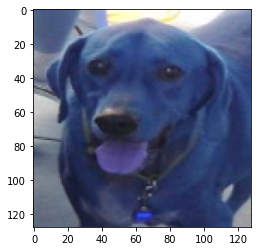

In [90]:
pth='/home/heroo/datascience/23777_30378_upload_test_set/test_set/dogs/dog.4014.jpg'
img_data3=[]
img3=cv2.imread(pth, 1)   
img3=cv2.resize(img3,(128, 128))
img_data3.append(img_to_array(img3))

img_array3 = np.reshape(img_data3, (len(img_data3), 128, 128, 3))
img_array3 = img_array3.astype('float32') / 128.

imshow(img3)

In [87]:
pred=encoder.predict(img_array3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


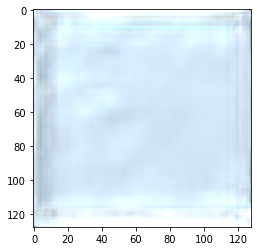

In [93]:
imshow(pred[0].reshape(128,128,3))

It means if we increase the number of epochs upto 10000  then it starts showing image like cat.
